In [5]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
#import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.collections import PolyCollection


In [3]:
fc_data = []
first_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 well A9.csv'
fc_data.append(pd.read_csv(first_file))

second_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 A10.csv'
fc_data.append(pd.read_csv(second_file))

third_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 A11.csv'
fc_data.append(pd.read_csv(third_file))

fourth_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 A12.csv'
fc_data.append(pd.read_csv(fourth_file))

fifth_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 B1.csv'
fc_data.append(pd.read_csv(fifth_file))

sixth_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 B2.csv'
fc_data.append(pd.read_csv(sixth_file))

sixth_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 B3.csv'
fc_data.append(pd.read_csv(sixth_file))
sixth_file = '/Users/willcheney/Code/code/Flow Cytometry/2020-06-19/2020-06-19 B4.csv'
fc_data.append(pd.read_csv(sixth_file))

In [3]:
mean_FL1_A = []
median_FL1_A = []

for i in fc_data:
    
    mean_FL1_A.append(np.mean(i['FL1-A']))
    median_FL1_A.append(np.median(i['FL1-A']))




In [7]:
bin_exp = np.log10(max(fc_data[5]['FL1-A']))/250
bins = [1]
counter = 1
while(bins[-1] < 10**(np.log10(max(fc_data[5]['FL1-A'])))):
    
    bins.append(10**(bin_exp*counter))
    counter += 1
    

IndexError: list index out of range

In [25]:
cmap = plt.get_cmap('plasma')
legend  = ['0','0.001µM','0.01µM','0.1µM','1µM','10µM']
for i in range(0,len(fc_data)):
    plt.hist(fc_data[i]['FL1-A'],bins = 'auto', histtype = 'step', color = cmap((i*50)), label = legend[i])
    plt.xscale('log')
    
#plt.legend()    
fig = plt.gcf()
plt.show()


IndexError: list index out of range

In [9]:
cmap = plt.get_cmap('Blues')

In [39]:
cmap(1000)

(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)

In [10]:
fig.savefig('2019-11-27 viridis WCY13 DAMGO dose response all hist',dpi = 300, bbox_inches='tight')

In [61]:
len(bins)

151

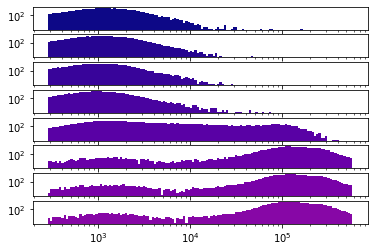

In [27]:
    
fig, ax = plt.subplots(len(fc_data), 1, sharex = True, sharey = True)   
for i in range(0,len(fc_data)):
        #plt.subplot(len(fc_data), 1, (i + 1))
        ax[i].hist(fc_data[i]['FL1-A'], bins[100:(len(bins)-15)], color = cmap((i*10)), zorder = 5)
        #plt.hist(fc_data[i]['FL1-A'], bins[50:], histtype = 'step', color = 'k', zorder= 15)
        plt.xscale('log')
        plt.yscale('log')
        

#plt.subplots_adjust(hspace = 0.)

fig2 = plt.gcf()
plt.show()
    

In [88]:
fig.savefig('2020-06-18 representative histogram with concentration labels',dpi = 300, bbox_inches='tight')

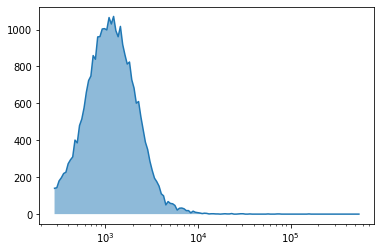

In [65]:
a = np.histogram(fc_data[0]['FL1-A'], bins[100:(len(bins)-15)])
b = list(range(len(a[0])))
plt.plot(bins[100:(len(bins)-16)], a[0])
plt.xscale('log')
plt.fill_between(bins[100:(len(bins)-16)], a[0], alpha = 0.5)
plt.show()

-10.0
-9.0
-8.0
-7.0
-6.0
-5.0
-4.0
-3.0


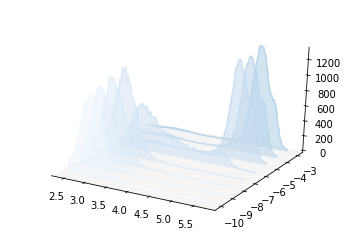

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
verts = []
zs = []
yticks = [10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3]
for i in range(len(fc_data)):
    a = np.histogram(fc_data[i]['FL1-A'], bins[100:(len(bins)-15)])
    
    ax.plot3D(np.log10(bins[100:(len(bins)-16)]), [np.log10(yticks[i])]*len(bins[100:(len(bins)-16)]), a[0], color = cmap((i*10)))
    verts.append(polygon_under_graph(np.log10(bins[100:(len(bins)-16)]), a[0]))
    print(np.log10(yticks[i]))
    zs.append(np.log10(yticks[i]))
    
    
poly = PolyCollection(verts, facecolor = cmap(([10,20,30,40,50,60,70,80])), alpha = 0.6)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_yticks(np.log10(yticks))
#ax.set_zticks([])
ax.grid(False)

fig = plt.gcf()
plt.show()

In [57]:
bins[100:(len(bins)-16)]

[283.10940213905246,
 299.55311187232655,
 316.95191383407905,
 335.36128219526665,
 354.8399132069243,
 375.4499123467231,
 397.2569923354708,
 420.33068265490965,
 444.74455123484285,
 470.57643901640495,
 497.90870813936016,
 526.8285045447503,
 557.4280358301648,
 589.8048652435457,
 624.0622227529022,
 660.3093341837354,
 698.661769473595,
 739.2418111541489,
 782.1788442356161,
 827.6097687366718,
 875.6794361751404,
 926.5411114111645,
 980.3569613153903,
 1037.2985718202476,
 1097.547495002864,
 1161.29582794394,
 1228.7468252082172,
 1300.1155468993547,
 1375.629544355467,
 1455.5295856716052,
 1540.070423362405,
 1629.521606612524,
 1724.168340704647,
 1824.3123963652333,
 1930.2730719273595,
 2042.388211378429,
 2161.015281538653,
 2286.532511804774,
 2419.34010009301,
 2559.861488826192,
 2708.5447150334585,
 2865.863838867178,
 3032.3204550917185,
 3208.445292363309,
 3394.799905400141,
 3591.9784654379646,
 3800.6096546798626,
 4021.3586707804975,
 4254.929347755832,
 450

In [17]:
len(np.log10(bins[100:(len(bins)-16)]))


135

In [12]:
def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

In [77]:
cmap([1,2])

array([[0.063536, 0.028426, 0.533124, 1.      ],
       [0.075353, 0.027206, 0.538007, 1.      ]])

In [92]:
np.std([9.58, 50.2, 132, 512.4])

199.13701834415417